# 桌遊習慣分析

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
#plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

age_gender_data = pd.read_csv('DataBase.csv')
#age_gender_data.head()
age_gender_data

,Gender,Education,Like,Hard,People,Time,Money,Deep,Collection
0,1,4,2,2,2,2,2,1,2
1,1,4,2,2,2,3,2,2,1
2,1,4,2,2,3,2,2,1,1
3,1,4,2,2,3,3,2,3,1
4,1,4,2,2,2,3,2,2,1
5,2,4,2,2,3,2,2,2,1
6,1,4,8,2,2,1,1,1,1
7,1,4,2,2,2,2,2,2,1
8,2,4,2,2,2,1,2,1,1
9,1,4,4,1,2,1,3,1,1


#表格

''

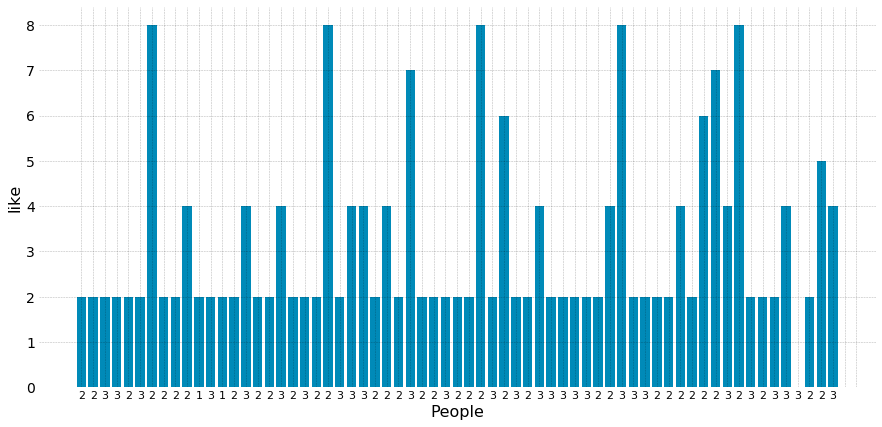

In [6]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i], [row['Like']],
            color=['#008AB8'], width=0.8, align='center', edgecolor='none')
    
#plt.xlim(-0.6, 20.6)
#plt.ylim(-12.1e6, 12.1e6)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 67), age_gender_data['People'], fontsize=11)
#plt.yticks(np.arange(-12e6, 13e6, 2e6),
#           ['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e6, 13e6, 2e6)])
plt.xlabel('People')
plt.ylabel('like')

plt.savefig('pop_pyramid_rotated.pdf')
;

###2) Doesn't allow direct comparisons between the two categories.

''

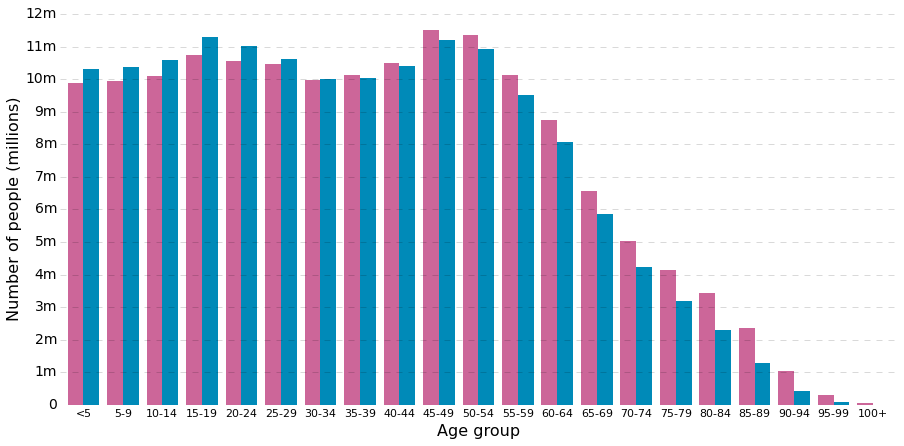

In [3]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Females_2010'], row['Males_2010']],
            color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 13e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')

plt.savefig('pop_pyramid_grouped.pdf')
;

###3) Relative trends between the categories can be masked by displaying absolute values.

KeyError: 'Females_2010'

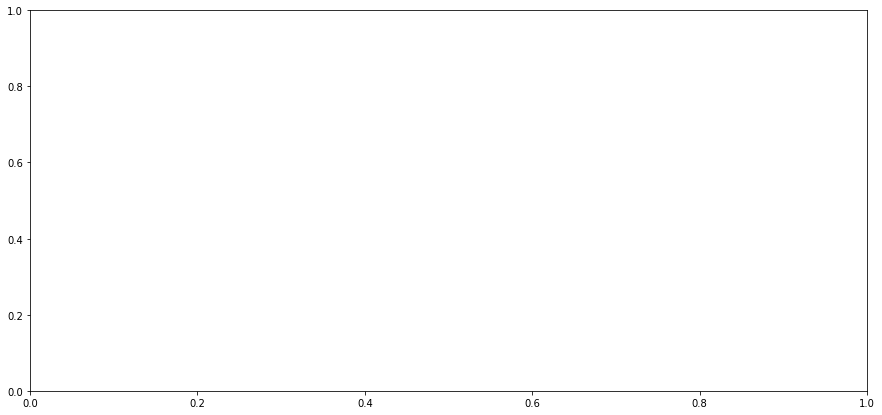

In [5]:
age_gender_data['Male_Pct'] = age_gender_data['Males_2010'] / age_gender_data['Total_Pop_2010']
age_gender_data['Female_Pct'] = age_gender_data['Females_2010'] / age_gender_data['Total_Pop_2010']

plt.figure(figsize=(15, 7))

for (i, row) in age_gender_data.iterrows():
    plt.bar([i], [row['Male_Pct']],
            color=['#008AB8'], width=0.9, align='center', edgecolor='none')
    plt.bar([i], [row['Female_Pct']], bottom=[row['Male_Pct']],
            color=['#CC6699'], width=0.9, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(0, 1)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False)
plt.yticks(np.arange(0, 1.01, 0.25),
           ['{}%'.format(int(x * 100)) for x in np.arange(0, 1.01, 0.25)])
plt.xlabel('Age group')
plt.ylabel('Percentage of age group')

plt.plot([-0.425, 20.425], [0.5, 0.5], lw=2, color='black')
plt.plot([-0.425, 20.425], [0.25, 0.25], lw=2, color='black')

plt.savefig('pop_pyramid_stacked.pdf')
;